<a href="https://colab.research.google.com/github/dniboghgnis/New_additions/blob/master/EDA_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('sales_data.csv')
df = df.applymap(lambda x: str(x).strip())
df['Sales Price'] = df['Sales Price'].replace("-",0)
df['MRP'] = df['MRP'].replace("-",0)
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Year'] = df['Sale Date'].dt.year
df['Month'] = df['Sale Date'].dt.month
df['Sales Price'] = df['Sales Price'].astype(float)
df['MRP'] = df['MRP'].astype(float)
df['Sales Qty'] = df['Sales Qty'].astype(int)
df['Total Sales'] = df['Sales Price'] * df['Sales Qty']
df['Discount']=df['MRP']-df['Sales Price']

In [265]:
df.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Year,Month,Total Sales,Discount
0,SKU0001,BRAND001,Cat01,BILL00001,Store 2,2017-06-23,Sale,92.00,92.00,1,2017,6,92.00,0.0
1,SKU0002,BRAND002,Cat01,BILL00002,Store 2,2017-01-03,Sale,68.00,68.00,1,2017,1,68.00,0.0
2,SKU0003,BRAND002,Cat01,BILL00003,Store 2,2017-01-03,Sale,80.67,80.67,1,2017,1,80.67,0.0
3,SKU0004,BRAND003,Cat01,BILL00004,Store 2,2017-01-03,Sale,113.33,113.33,1,2017,1,113.33,0.0
4,SKU0002,BRAND002,Cat01,BILL00005,Store 2,2017-01-03,Sale,68.00,68.00,1,2017,1,68.00,0.0


In [0]:
storeSales=df.groupby(['Store Code','Month'], as_index=False)['Total Sales'].sum()
brandSales=df.groupby(['Month', 'Brand Code'], as_index=False)['Total Sales'].sum()
# brandSales=brandSales[brandSales['Total Sales']>=3500] #uncomment for cleaner graph
categorySales=df.groupby(['Month','Category'], as_index=False)['Total Sales'].sum()

In [0]:
brandDiscount=df.groupby(['Month','Brand Code'],as_index=False)['Discount'].sum()
storeDiscount=df.groupby(['Month','Store Code'],as_index=False)['Discount'].sum()
categoryDiscount=df.groupby(['Month','Category'],as_index=False)['Discount'].sum()

In [0]:
brandQty=df.groupby(['Month','Brand Code'],as_index=False)['Sales Qty'].sum()
storeQty=df.groupby(['Month','Store Code'],as_index=False)['Sales Qty'].sum()
categoryQty=df.groupby(['Month','Category'],as_index=False)['Sales Qty'].sum()

In [269]:
storeSales.head()

,Store Code,Month,Total Sales
0,Store 1,1,26243.71
1,Store 1,2,24046.44
2,Store 1,3,7879.42
3,Store 1,4,6530.75
4,Store 1,5,14728.71


In [270]:
brandSales.head()

,Month,Brand Code,Total Sales
0,1,BRAND001,11393.40
1,1,BRAND002,4406.71
2,1,BRAND003,10035.29
3,1,BRAND004,408.01
4,1,BRAND005,6549.25


In [271]:
categorySales.head()

,Month,Category,Total Sales
0,1,Cat01,79892.86
1,1,Cat02,1310.73
2,1,Cat03,983.35
3,1,Cat04,19125.64
4,1,Cat05,543.87


In [272]:
brandDiscount.head()

,Month,Brand Code,Discount
0,1,BRAND001,49.32
1,1,BRAND002,-42.93
2,1,BRAND003,-792.55
3,1,BRAND004,0.00
4,1,BRAND005,22.67


In [273]:
storeDiscount.head()

,Month,Store Code,Discount
0,1,Store 1,531.44
1,1,Store 2,563.70
2,1,Store 3,325.54
3,1,Store 4,520.65
4,1,Store 5,-953.91


In [274]:
categoryDiscount.head()

,Month,Category,Discount
0,1,Cat01,-259.45
1,1,Cat02,2.34
2,1,Cat03,10.84
3,1,Cat04,1111.27
4,1,Cat05,14.58


In [275]:
brandQty.shape

(1563, 3)

In [276]:
storeQty.head()

,Month,Store Code,Sales Qty
0,1,Store 1,1344
1,1,Store 2,988
2,1,Store 3,1482
3,1,Store 4,1504
4,1,Store 5,1924


In [277]:
categoryQty.head()

,Month,Category,Sales Qty
0,1,Cat01,1268
1,1,Cat02,134
2,1,Cat03,77
3,1,Cat04,3308
4,1,Cat05,43


In [0]:
pivot1=storeSales.pivot(index='Month', columns='Store Code', values='Total Sales')
pivot2=brandSales.pivot(index='Month', columns='Brand Code', values='Total Sales')
pivot3=categorySales.pivot(index='Month', columns='Category', values='Total Sales')

In [0]:
pivot4=brandDiscount.pivot(index='Month', columns='Brand Code', values='Discount')
pivot5=storeDiscount.pivot(index='Month', columns='Store Code', values='Discount')
pivot6=categoryDiscount.pivot(index='Month', columns='Category', values='Discount')

In [0]:
pivot7=brandQty.pivot(index='Month', columns='Brand Code', values='Sales Qty')
pivot8=storeQty.pivot(index='Month', columns='Store Code', values='Sales Qty')
pivot9=categoryQty.pivot(index='Month', columns='Category', values='Sales Qty')

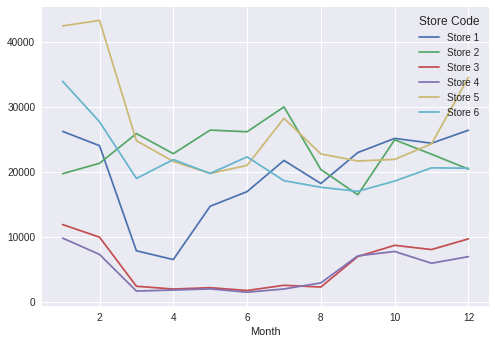

In [281]:
pivot1.plot()

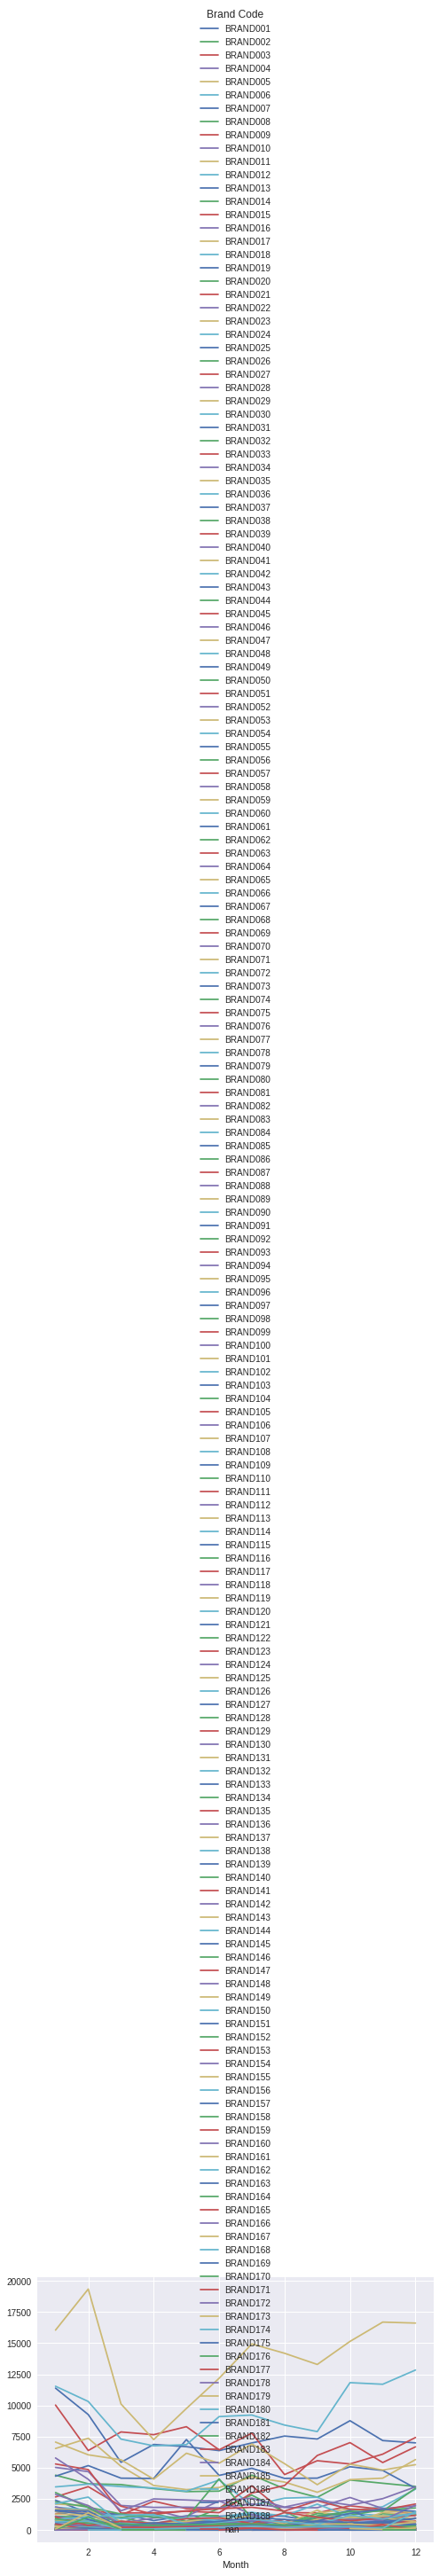

In [282]:
pivot2.plot()

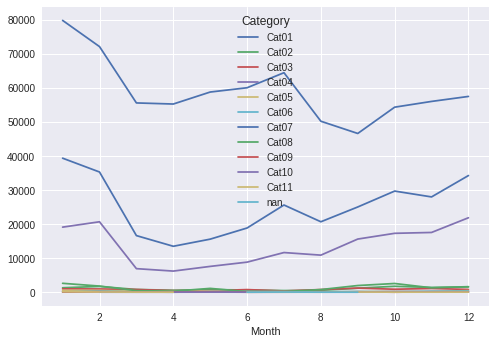

In [283]:
pivot3.plot()

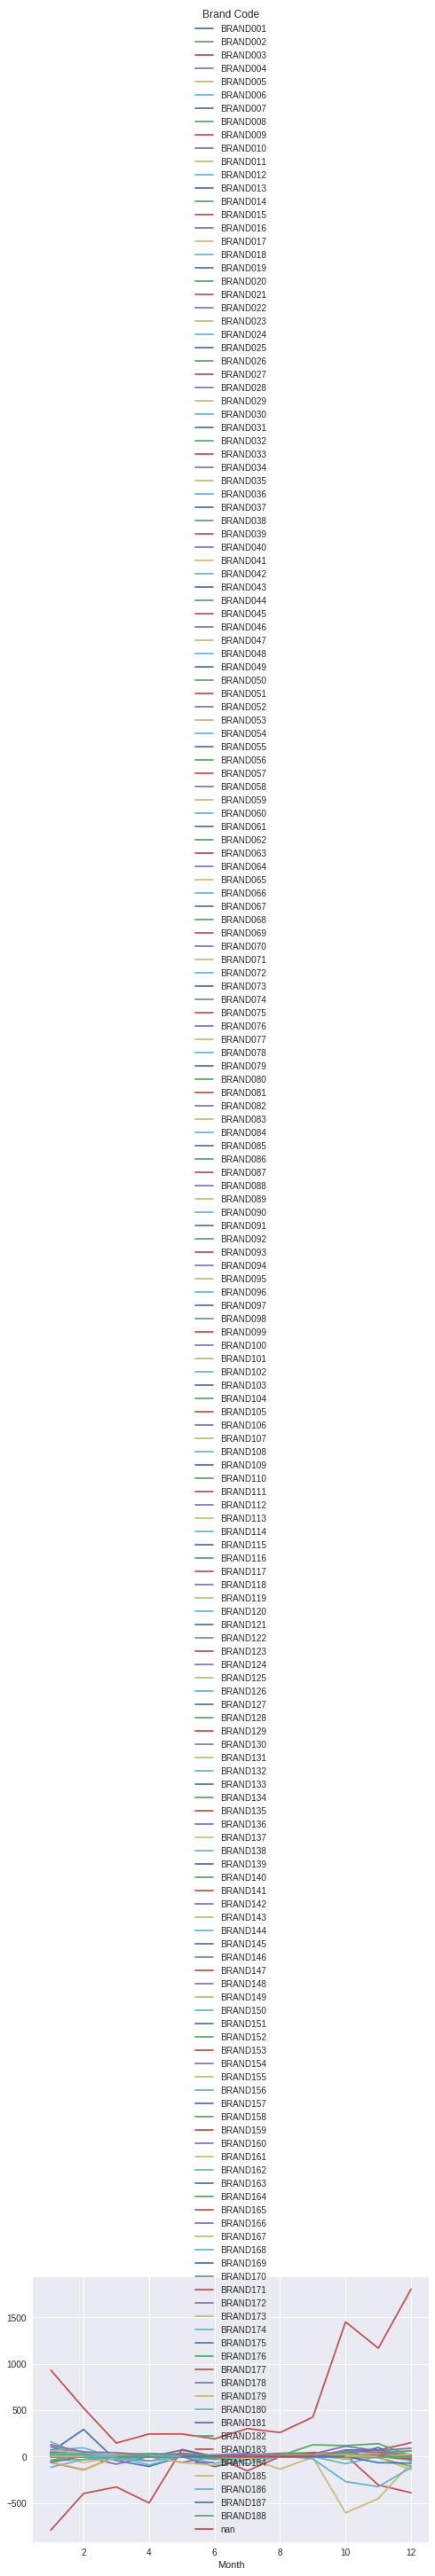

In [284]:
pivot4.plot()

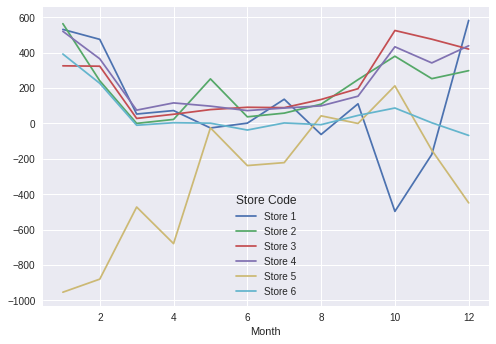

In [285]:
pivot5.plot()

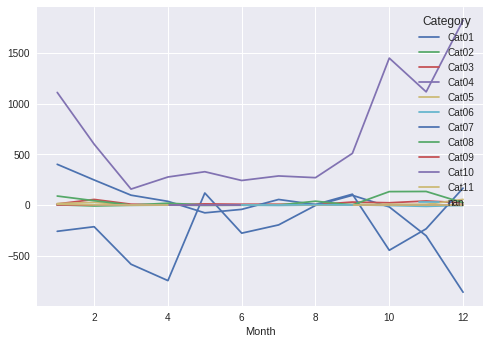

In [286]:
pivot6.plot()

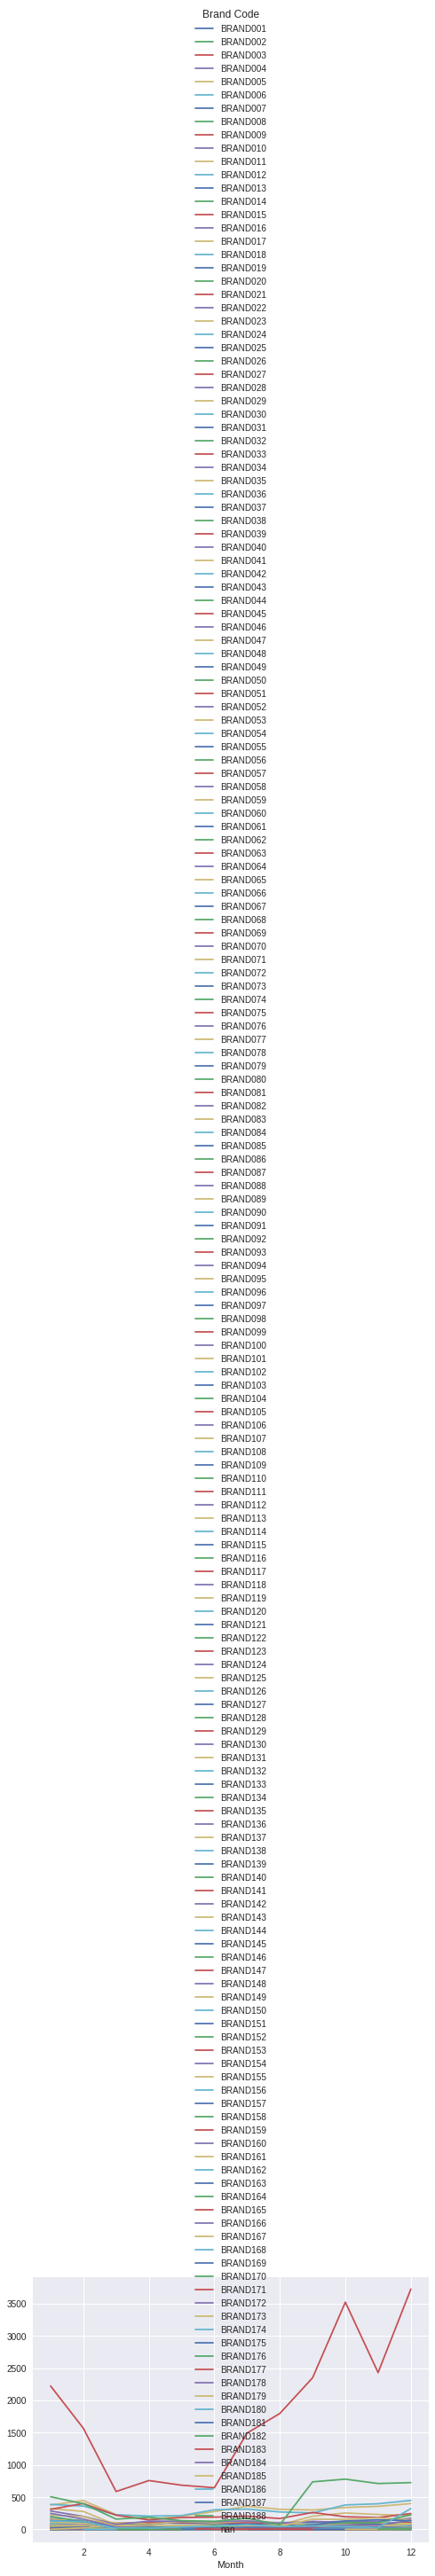

In [287]:
pivot7.plot()

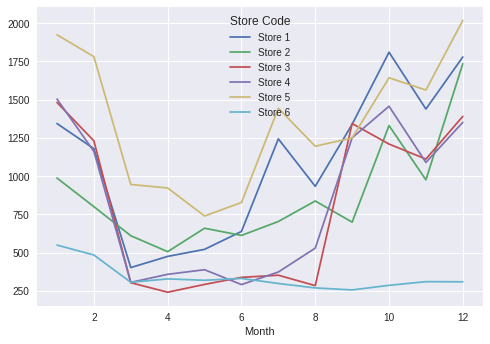

In [288]:
pivot8.plot()

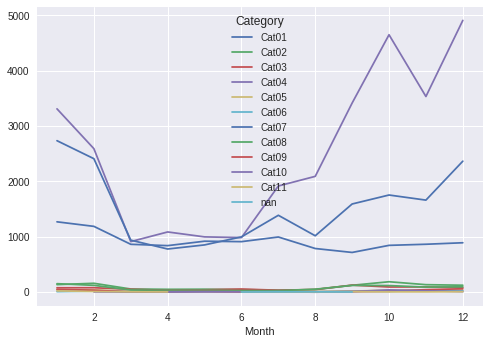

In [289]:
pivot9.plot()

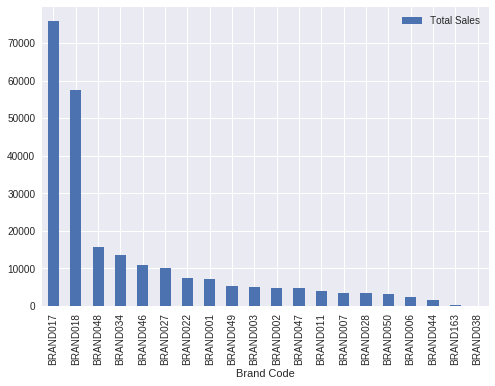

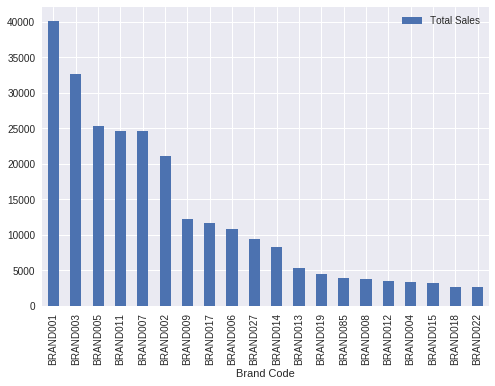

In [290]:
bestBrands=df.groupby(['Brand Code','Store Code'],as_index=False)['Total Sales'].sum()
bestBrands.head()
bestBrands1=bestBrands[bestBrands['Store Code']=='Store 1']
# bestBrands1.head()
bestBrands1.sort_values(by='Total Sales',ascending=False)[:20].set_index('Brand Code').plot.bar()
bestBrands2=bestBrands[bestBrands['Store Code']=='Store 2']
bestBrands2.sort_values(by='Total Sales',ascending=False)[:20].set_index('Brand Code').plot.bar()

In [0]:
clusteringDF=pd.DataFrame()
clusteringDF['Brand Code']=brandQty[['Brand Code']]
clusteringDF['Sales Qty']=brandQty[['Sales Qty']]
clusteringDF['Discount']=brandDiscount[['Discount']]
clusteringDF['Total Sales']=brandSales[['Total Sales']]
clusteringDF1=clusteringDF.groupby(['Brand Code'],as_index=False)['Total Sales'].sum()
clusteringDF2=clusteringDF.groupby(['Brand Code'],as_index=False)['Sales Qty'].sum()
clusteringDF3=clusteringDF.groupby(['Brand Code'],as_index=False)['Discount'].sum()

In [292]:
clusteringDF3

,Brand Code,Discount
0,BRAND001,99.62
1,BRAND002,-204.24
2,BRAND003,-2736.50
3,BRAND004,-146.67
4,BRAND005,-15.99
5,BRAND006,-387.01
6,BRAND007,12.87
7,BRAND008,-19.10
8,BRAND009,-259.33
9,BRAND010,-4.76


In [293]:
cluster=pd.DataFrame()
cluster['qty']=clusteringDF2['Sales Qty']
cluster['sales']=clusteringDF1['Total Sales']
cluster['discount']=clusteringDF3['Discount']
cluster

,qty,sales,discount
0,1330,90876.40,99.62
1,473,42970.30,-204.24
2,1156,83340.73,-2736.50
3,114,6937.44,-146.67
4,829,54314.48,-15.99
5,487,35040.80,-387.01
6,1008,55990.15,12.87
7,202,8029.74,-19.10
8,320,21142.10,-259.33
9,305,5656.28,-4.76


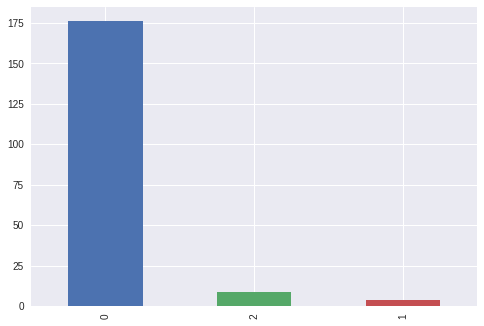

In [294]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster[['qty','sales','discount']])
temp5=pd.Series(kmeans.labels_)
temp5.value_counts().plot.bar()